<a href="https://colab.research.google.com/github/lucia-ferrer/Redes-1/blob/pm/perceptron.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Importar colab - **github**

In [1]:
!git clone https://github.com/lucia-ferrer/Redes-1.git

Cloning into 'Redes-1'...
remote: Enumerating objects: 55, done.
remote: Counting objects: 100% (55/55), done.
remote: Compressing objects: 100% (45/45), done.
remote: Total 55 (delta 18), reused 37 (delta 9), pack-reused 0
Unpacking objects: 100% (55/55), done.


### **Perceptron**

In [2]:
""" Regression problem: MLP con Keras """
import tensorflow as tf
import numpy as np
import pandas as pd
#from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense

# CARGAR DATOS compactiv
# Cambiar parámetros correspondientes si el delimitador no es una coma, o si el archivo contiene cabeceras
#pueden ser numpy arrays o dataframes
#en este caso probamos con ndarrays
train_set = pd.read_csv('/content/Redes-1/training_set.csv', header='infer', delimiter=',')
valid_set = pd.read_csv('/content/Redes-1/validation_set.csv', header='infer', delimiter=',')
test_set = pd.read_csv('/content/Redes-1/validation_set.csv', header='infer', delimiter=',')

# SELECCION DE LA SALIDA. Num de columna del target.
y_train = np.array(train_set.iloc[:,-1:])
X_train = np.array(train_set.iloc[: , :-1])
y_valid = np.array(valid_set.iloc[:,-1:])
X_valid = np.array(valid_set.iloc[: , :-1])
y_test = np.array(test_set.iloc[:,-1:])
X_test = np.array(test_set.iloc[: , :-1])
num_train_samples=len(y_train)


In [3]:
# COMPROBAR DIMENSIONES DE LOS DATOS
print('X_train: ',X_train.shape)
print('y_train: ',y_train.shape)
print('X_valid: ',X_valid.shape)
print('y_valid: ',y_valid.shape)
print('X_test: ',X_test.shape)
print('y_test: ',y_test.shape)

X_train:  (5733, 21)
y_train:  (5733, 1)
X_valid:  (1228, 21)
y_valid:  (1228, 1)
X_test:  (1228, 21)
y_test:  (1228, 1)


In [4]:
# Para la entrada de la red
input_shape=(X_train.shape [1],) #crea una tupla (21,)

#funciones con diferentes modelos
def create_PM_sigmoid(num_hidden_neurons = 50):
  #1 capa oculta y 1 neurona de salida con sigmoide
  model = Sequential()
  model.add(Dense(num_hidden_neurons, input_shape=input_shape, activation='sigmoid'))
  model.add(Dense(1,activation='sigmoid'))
  return model

def create_PM_relu(num_hidden_neurons = 50):
  #1 capa oculta con relu y 1 neurona de salida lineal
  model = Sequential()
  model.add(Dense(num_hidden_neurons, input_shape=input_shape, activation='relu'))
  model.add(Dense(1,activation='linear'))
  return model

#modelo lineal, solo para comparar con el programa desarrollado.
def create_lineal():
  # Una sola neurona lineal (Adaline)
  model = Sequential()
  model.add(Dense(1, input_shape=input_shape, activation='linear'))
  return model

In [9]:
#Seleccionar el modelo llamando a la función correspondiente
model=create_PM_relu(20) # 1 capa relu con 20 neuronas y salida lineal
#model=create_PM_sigmoid(20) # 1 capa sigmoid con 20 neuronas y salida sigmoid
#model=create_lineal() # 1 capa salida LINEAL (ADALINE)
model.summary() #visualizar la estructura del modelo


Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_2 (Dense)             (None, 20)                440       
                                                                 
 dense_3 (Dense)             (None, 1)                 21        
                                                                 
Total params: 461
Trainable params: 461
Non-trainable params: 0
_________________________________________________________________


In [10]:
# CONFIGURAR MODELO Y ENTRENAMIENTO
lr = 0.2
epochs = 300
batch_size=32 #no cambiar este valor.
#Para poder ver la curva de validación hay que poner validation_freq=1. Tarda más
model.compile(loss='mean_squared_error', optimizer=tf.keras.optimizers.SGD(learning_rate=lr, momentum=0), metrics=['mse'] )
historico = model.fit(X_train, y_train, epochs=epochs, batch_size=batch_size, verbose=1, validation_data=(X_valid,y_valid),
shuffle=False, validation_freq=1)


Epoch 1/300
180/180 [==============================] - 1s 2ms/step - loss: 0.0171 - mse: 0.0171 - val_loss: 0.0096 - val_mse: 0.0096
Epoch 2/300
180/180 [==============================] - 0s 2ms/step - loss: 0.0073 - mse: 0.0073 - val_loss: 0.0063 - val_mse: 0.0063
Epoch 3/300
180/180 [==============================] - 0s 2ms/step - loss: 0.0049 - mse: 0.0049 - val_loss: 0.0044 - val_mse: 0.0044
Epoch 4/300
180/180 [==============================] - 0s 2ms/step - loss: 0.0035 - mse: 0.0035 - val_loss: 0.0034 - val_mse: 0.0034
Epoch 5/300
180/180 [==============================] - 0s 2ms/step - loss: 0.0028 - mse: 0.0028 - val_loss: 0.0027 - val_mse: 0.0027
Epoch 6/300
180/180 [==============================] - 0s 2ms/step - loss: 0.0023 - mse: 0.0023 - val_loss: 0.0023 - val_mse: 0.0023
Epoch 7/300
180/180 [==============================] - 0s 2ms/step - loss: 0.0020 - mse: 0.0020 - val_loss: 0.0021 - val_mse: 0.0021
Epoch 8/300
180/180 [==============================] - 0s 2ms/step - 

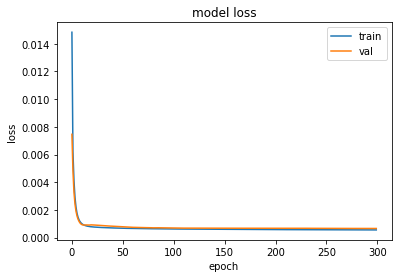

39/39 [==============================] - 0s 2ms/step - loss: 6.6128e-04 - mse: 6.6128e-04
   prediccion    target
0    0.827769  0.777778
1    0.948265  0.949495
2    0.930566  0.919192
3    0.745345  0.767677
4    0.872714  0.848485
5    0.966953  0.979798
6    0.872881  0.888889
7    0.917377  0.919192
8    0.981086  0.969697
9    0.888752  0.878788


In [7]:
#______________________________________________________________________________
## plot de evolución de loss (mse)
from matplotlib import pyplot as plt
plt.plot(historico.history['loss'])
plt.plot(historico.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper right')
plt.show()

#______________________________________________________________________________
#Evaluar el modelo con el fich de test
results_test = model.evaluate(X_test, y_test)
results_test[0]
#resultado es una lista con los valores de loss y las métricas elegidas.
#En este caso son loss y mse que coinciden.

# predicciones en test
test_pred = model.predict(X_test)
#crear un ndarray: columna 1 predicciones, columna 2 target
comp = np.append(test_pred, y_test, axis = 1)
comp_df = pd.DataFrame(comp, columns=['prediccion','target'])
#guardar en fichero las salidas de test y target
np.savetxt('salidas_test.txt',comp_df)
#mostrar 10 primeras filas
print(comp_df.iloc[:10,:])

In [8]:
# GUARDAR RESULTADOS EN FICHEROS
# evolución del entrenamiento
# son los datos que se usan para construir los plots
# En este caso, la variable 'historico' contiene los datos del último entrenamiento realizado
np.savetxt('/Redes-1/historico_pm/historicoTrainLoss.txt',historico.history['loss'])
np.savetxt('/Redes-1/historico_pm/historicoValLoss.txt',historico.history['val_loss'])

errores = [historico.history['loss'][-1], historico.history['val_loss'][-1], results_test[0]]
#lista con los errores de entrenamiento, validación y test

#guarda el modelo completo
model.save('/Redes-1/modelos_pm/modelo.h5')
#guarda solo pesos
model.save_weights('/Redes-1/modelos_pm/pesos.h5')
